In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv('C:/Users/Teacher-5B773C/Downloads/datasets/encoded-Sample - Superstore - Modified -.csv')

In [4]:
df.head(2)

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.58


**Data Cleaning**

***removing duplicates***

In [5]:
duplicate_rows=df[df.duplicated()]
df=df.drop_duplicates()

***Format dates***

In [6]:
df['OrderDate']=pd.to_datetime(df['OrderDate'],format='%m/%d/%Y')
df['ShipDate']=pd.to_datetime(df['ShipDate'],format='%m/%d/%Y')

In [7]:
df.head(2)

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.91
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.58


***Format sales and Profit***

In [8]:
df['Sales']=df['Sales'].map('${:,.2f}'.format)
df['Profit']=df['Profit'].map('${:,.2f}'.format)

***Remove nulls***

In [9]:
null_val=df.isnull().sum()
null_val.head()

RowID        0
OrderID      0
OrderDate    0
ShipDate     0
ShipMode     0
dtype: int64

****Basic statistics****

***Total number of sales***

In [10]:
unique_sale_values=df['Sales'].unique()

In [11]:
unique_sale_values

array(['$261.96', '$731.94', '$14.62', ..., '$13.86', '$437.47',
       '$243.16'], dtype=object)

In [12]:
df['Sales']=df['Sales'].replace('[\$,]','',regex=True).astype(float)

In [13]:
ts=df['Sales'].sum()
print("Total sales:" ,'$',ts)

Total sales: $ 2297201.0700000003


***Average profit per order***

In [14]:
#average profit grouped by ORDERID 
df['Profit']=df['Profit'].replace('[\$,]','',regex=True).astype(float)
AV=df.groupby('OrderID')['Profit'].mean()

In [15]:
overallAV=AV.mean()
print('Average Profit Per Order :','$',overallAV)

Average Profit Per Order : $ 27.462705969946736


***Discount min and max***

In [16]:
df['Discount'].min()

0.0

In [17]:
df['Discount'].max()

0.8

***total orders***

In [18]:
total_orders=df['OrderID'].nunique()
print('Total unique orders :',total_orders)

Total unique orders : 5009


# Time based analysis and trends

## what is the distribution of orders by month and by year

In [19]:
df['year']=df['OrderDate'].dt.year
df['month']=df['OrderDate'].dt.month

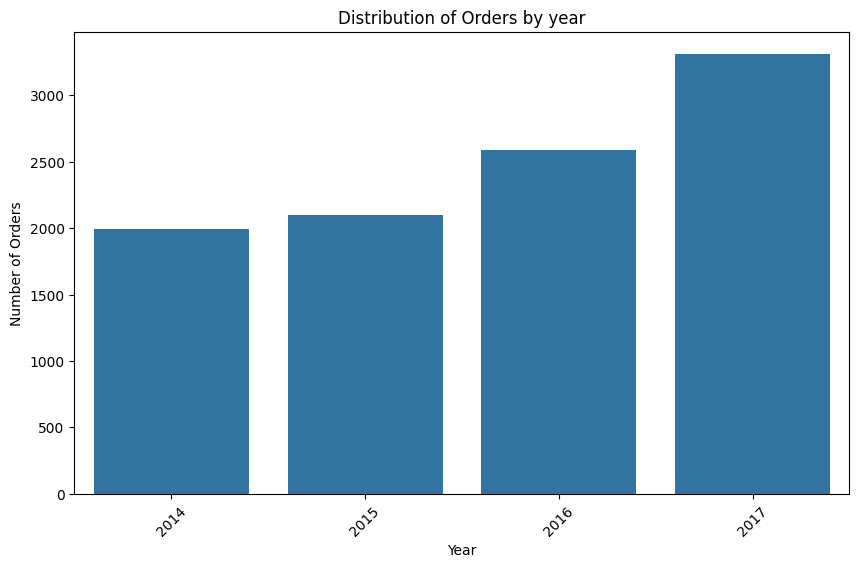

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='year', data=df)
plt.title('Distribution of Orders by year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.xticks(ticks=np.arange(len(df['year'].unique())),labels=sorted(df['year'].unique()),rotation=45)
plt.show()

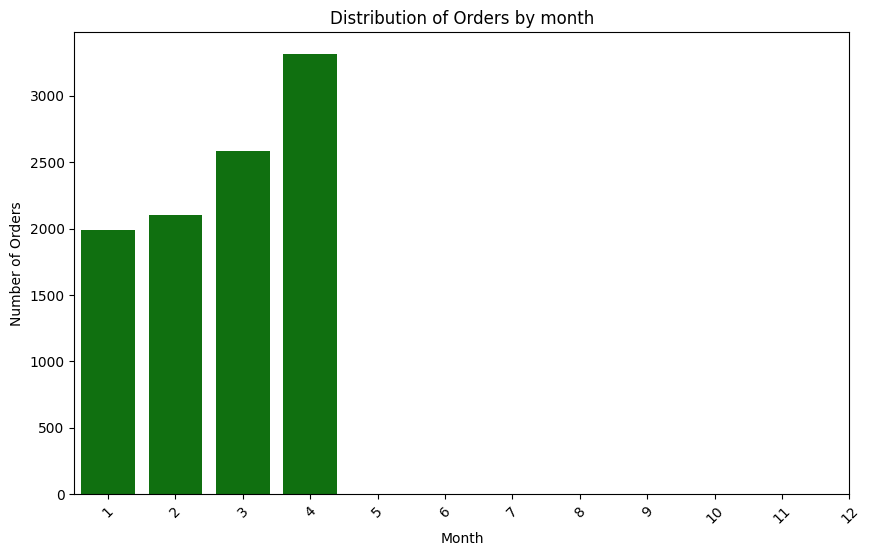

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='year',data=df,color='green')
plt.title('Distribution of Orders by month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(ticks=np.arange(len(df['month'].unique())),labels=sorted(df['month'].unique()),rotation=45)
plt.show()

## Is there a trend in sales or profit revenue?

### trend of sales by month

In [26]:
sales_by_month=df.groupby(pd.Grouper(key='OrderDate',freq='M'))['Sales'].sum()
profit_by_month=df.groupby(pd.Grouper(key='OrderDate',freq='M'))['Profit'].sum()

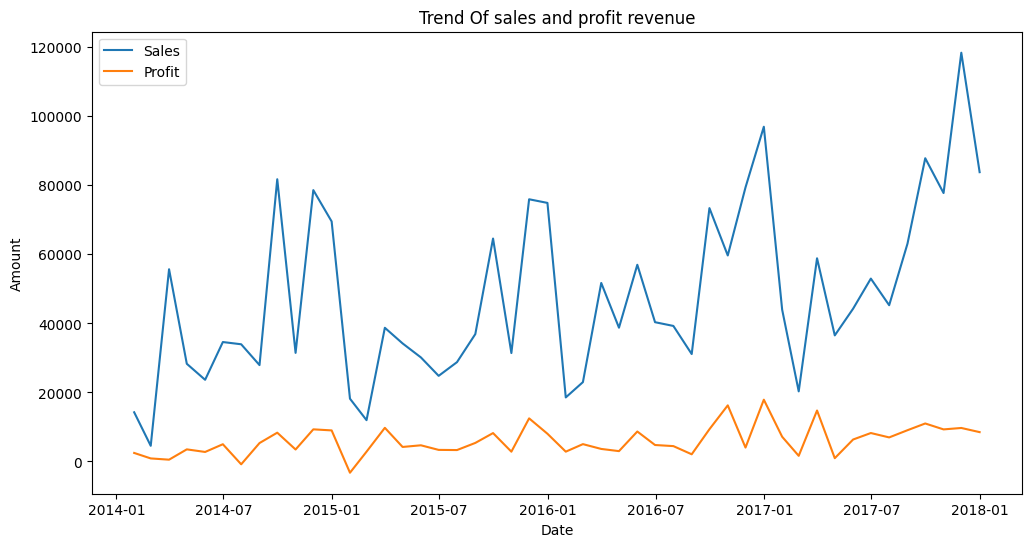

In [30]:
plt.figure(figsize=(12,6))
plt.plot(sales_by_month.index,sales_by_month.values,label='Sales')
plt.plot(profit_by_month.index,profit_by_month.values,label='Profit')
plt.title('Trend Of sales and profit revenue')
plt.xlabel('Date')
plt.ylabel('Amount')
#plt.xticks(ticks=np.arange(len(df['month'].unique())),labels=sorted(df['month'].unique()),rotation=45)
plt.legend()
plt.show()

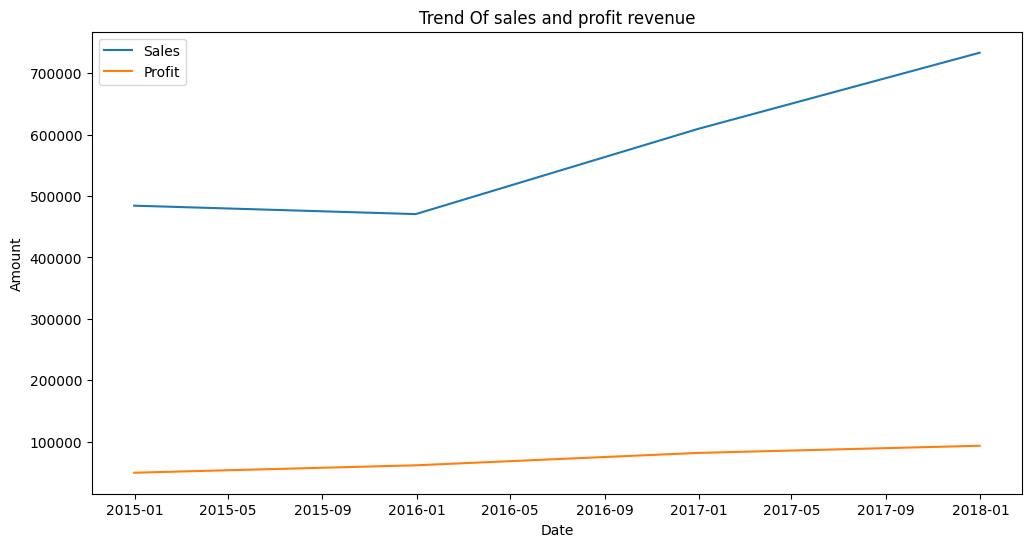

In [31]:
sales_by_year=df.groupby(pd.Grouper(key='OrderDate',freq='Y'))['Sales'].sum()
profit_by_year=df.groupby(pd.Grouper(key='OrderDate',freq='Y'))['Profit'].sum()
plt.figure(figsize=(12,6))
plt.plot(sales_by_year.index,sales_by_year.values,label='Sales')
plt.plot(profit_by_year.index,profit_by_year.values,label='Profit')
plt.title('Trend Of sales and profit revenue')
plt.xlabel('Date')
plt.ylabel('Amount')
#plt.xticks(ticks=np.arange(len(df['month'].unique())),labels=sorted(df['month'].unique()),rotation=45)
plt.legend()
plt.show()

## What is the average shipping time(difference between orderdate and shipdate)

In [34]:
df['shipping_time']=df['ShipDate']-df['OrderDate']
df['shipping_time_days']=df['shipping_time'].dt.days
average_st=df['shipping_time_days'].mean()
print('Average Shipping date:{:.2f}days'.format(average_st))

Average Shipping date:3.96days


# Customer Analysis

## Who are the top ten customers based on sales analysis


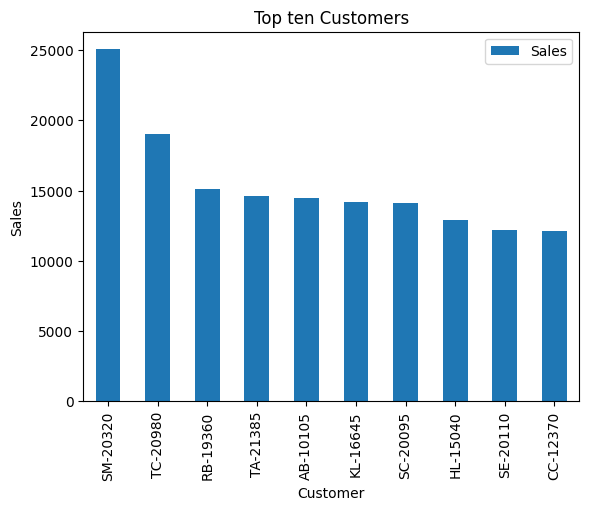

In [47]:
#Method 1
grouped_dfc=df.groupby('CustomerID').agg({'Sales':'sum'}).reset_index()
sorted_dfc=grouped_dfc.sort_values(by='Sales',ascending=False)
top_ten_customers=sorted_dfc[sorted_dfc['CustomerID'].isin(sorted_dfc.head(10)['CustomerID'])]
ax=top_ten_customers.plot(kind='bar',x='CustomerID',y=['Sales'])
ax.set_ylabel('Sales')
ax.set_xlabel('Customer')
ax.set_title('Top ten Customers')
plt.show()

In [ ]:
#method 2

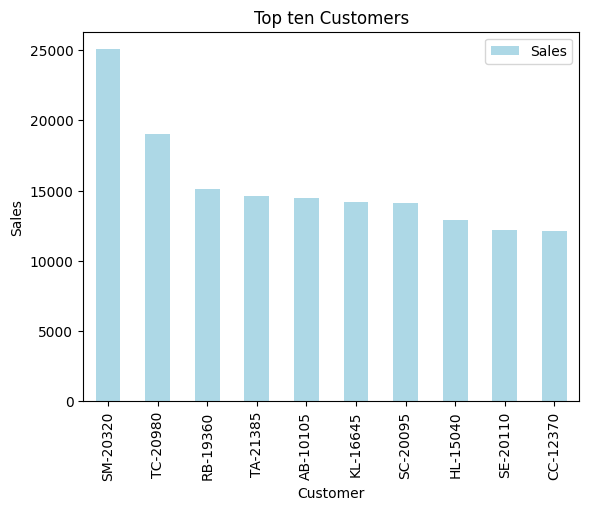

In [51]:
customer_sales=df.groupby('CustomerID')['Sales'].sum()
top_customers=customer_sales.nlargest(10)
ax=top_ten_customers.plot(kind='bar',x='CustomerID',y=['Sales'],color='lightblue')
ax.set_ylabel('Sales')
ax.set_xlabel('Customer')
ax.set_title('Top ten Customers')
plt.show()



## Are there rturning customers and what is the frequency of their returning also how many orders do the place

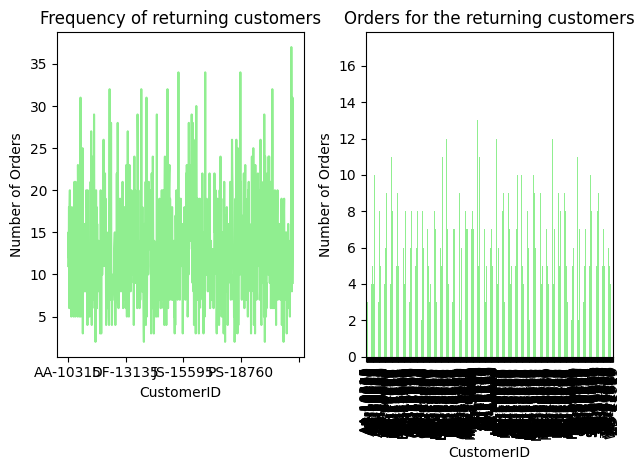

In [56]:
#Step 1: Indentifying the returning customers
customer_orders=df.groupby('CustomerID')['OrderID'].nunique()
ret_cust=customer_orders[customer_orders>1].index.tolist()
#step 2:The frequency
ret_cust_df=df[df['CustomerID'].isin(sorted_dfc.head(10)['CustomerID'])]
ret_cust_freq=ret_cust_df.groupby('CustomerID')['OrderID'].count()

plt.subplot(1,2,1)
ret_cust_freq.plot(kind='line',color='lightgreen')
plt.title('Frequency of returning customers')
plt.xlabel('CustomerID')
plt.ylabel('Number of Orders')

plt.subplot(1,2,2)
ret_cust_df.groupby('CustomerID')['OrderID'].nunique().plot(kind='bar',color='lightgreen')
plt.title('Orders for the returning customers')
plt.xlabel('CustomerID')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [62]:
print('Returning Customer frequency',ret_cust_freq)
print('-------------------------------------------\n')


Returning Customer frequency CustomerID
AA-10315    11
AA-10375    15
AA-10480    12
AA-10645    18
AB-10015     6
            ..
XP-21865    28
YC-21895     8
YS-21880    12
ZC-21910    31
ZD-21925     9
Name: OrderID, Length: 781, dtype: int64
-------------------------------------------

